<a href="https://colab.research.google.com/github/TrungBui-Purdue-5913/Spotify-Analysis_SIGAI2021/blob/main/Musics_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('./data/data.csv')

# (1.2) Preparing data for training

In [3]:
df_sample = df.sample(n=10000)

# Temporarily dropping song id
song_id = df_sample['id']
df_new = df_sample.drop('id', axis=1)

# Temporarily drop title
df_new = df_new.drop('name', axis=1)
# drop release date
df_new = df_new.drop('release_date', axis=1)

# converting column values of "artists"
df_new['artists'] = df_new['artists'].str.replace("'", " ")
df_new['artists'] = df_new['artists'].str.replace("[", " ")
df_new['artists'] = df_new['artists'].str.replace("]", " ")

# Converting artist column into binary dummy columns for machine learning
df_new = pd.concat([df_new.drop('artists', axis=1), df_new['artists'].str.get_dummies(sep=',')], axis=1)

# (2) Training ML Algorithm, Diagnosis

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20).fit_predict(df_new)

In [5]:
# add kmeans feature as column to data frame
df_sample['kmeans'] = kmeans

In [6]:
def give_rec(song_id_inputs):
    """input: list of song ids"""
    """output: id, artist name, and title of song that corresponds to the k value of most frequent k value in the list of song ids"""
    # add back id column in the function's local scope
    df_sample['id'] = song_id
    
    # dictionary showing frequency of unique k values from song_id_inputs
    k_dict = {}
    for i in df_sample.loc[df_sample['id'].isin(song_id_inputs)]['kmeans']:
        if i not in k_dict.keys():
            k_dict[i] = 1
        else:
            k_dict[i] += 1
    k = max(k_dict, key=k_dict.get)
    
    # determine which song in the df_sample has the same k value and randomly sample 10
    recommendations = df_sample[df_sample["kmeans"] == k]
    sampled = recommendations.sample(10)
    
    # return the song's id, artist name, and title
    return df_sample.loc[df_sample['id'].isin(sampled['id'])][['id', 'artists', 'name']]

In [7]:
df_sample.sort_values("popularity", ascending=False)[:10]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans
19688,0.21000,['Harry Styles'],0.448,208907,0.838,0,45S5WTQEGOB1VHr1Q4FuPl,0.000131,4,0.1310,-5.257,0,Golden,88,2019-12-13,0.0557,139.863,0.2540,2019,9
93854,0.28600,"['Robin Schulz', 'KIDDO']",0.504,190218,0.760,1,1FP9s72rDYty6mfoOEYKnE,0.000000,4,0.1510,-4.246,1,All We Got (feat. KIDDO),87,2020-10-16,0.0426,183.933,0.6400,2020,9
39342,0.01120,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,87,2020-08-28,0.0993,114.044,0.7370,2020,9
19480,0.00513,['Travis Scott'],0.834,312820,0.730,1,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,SICKO MODE,86,2018-08-03,0.2220,155.008,0.4460,2018,11
58402,0.01230,['Dua Lipa'],0.793,183290,0.793,0,3PfIrDoz19wz7qK7tYeu62,0.000000,11,0.0951,-4.521,0,Don't Start Now,85,2020-03-27,0.0830,123.950,0.6790,2020,17
58398,0.16700,['Dua Lipa'],0.730,221820,0.729,0,017PF4Q3l4DBUiWoXk4OWT,0.000001,4,0.3490,-3.434,0,Break My Heart,85,2020-03-27,0.0883,113.013,0.4670,2020,13
20052,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,84,2020-04-24,0.0514,129.979,0.2800,2020,17
20058,0.14300,"['Ty Dolla $ign', 'Post Malone']",0.782,143375,0.510,1,5IUtvfNvOyVYZUa6AJFrnP,0.000000,4,0.1150,-5.724,0,Spicy (feat. Post Malone),83,2020-10-23,0.0419,99.993,0.1180,2020,0
76452,0.15400,['Sam Smith'],0.653,213869,0.667,0,5hvwx5i67IwnCkjl9VHkNv,0.000000,10,0.1070,-6.764,0,Diamonds,83,2020-09-17,0.0423,104.181,0.5560,2020,9
39228,0.62900,"['Drake', 'Giveon']",0.735,220488,0.449,1,4wVOKKEHUJxHCFFNUWDn0B,0.000000,10,0.1130,-7.507,1,Chicago Freestyle (feat. Giveon),83,2020-05-01,0.3470,122.947,0.0397,2020,13


In [8]:
# Put in 10 most popular songs and get recommendation
id_list = list(df_sample.sort_values("popularity", ascending=False)[:10]["id"])

print("ID List")
print(id_list)
print("Give Rec")
print(give_rec(id_list))

ID List
['45S5WTQEGOB1VHr1Q4FuPl', '1FP9s72rDYty6mfoOEYKnE', '0t1kP63rueHleOhQkYSXFY', '2xLMifQCjDGFmkHkpNLD9h', '3PfIrDoz19wz7qK7tYeu62', '017PF4Q3l4DBUiWoXk4OWT', '39Yp9wwQiSRIDOvrVg7mbk', '5IUtvfNvOyVYZUa6AJFrnP', '5hvwx5i67IwnCkjl9VHkNv', '4wVOKKEHUJxHCFFNUWDn0B']
Give Rec
                            id  \
153466  1QczaHvYOWQYOIwOzsroDr   
114628  4sfWyRtVAphWQpbKcHMVFG   
81993   1CPUHZHjUEEvNfZOC1imkQ   
124871  3oLXQgbcC34Oo4gFHCeTmi   
9304    2Xdc6qyaFBJZ8QW1KhpVci   
99336   517VbkAk6WOoAPr8jFZyxw   
142540  6t20ttXdhxnDws5xYkeolJ   
80111   0YAaNGa9LE9tDVETnOIWc9   
151699  0aEy6wEHLFuqUmhlDx8Vdm   
41737   61EpvDHnicRLbkzmgjyFfK   

                                                  artists  \
153466                                 ['Cornelio Reyna']   
114628                            ['La Sonora Santanera']   
81993                        ['Miles Davis', 'Gil Evans']   
124871                                  ['Big Time Rush']   
9304                                      

In [9]:
# give_rec(["7uoFMmxln0GPXQ0AcCBXRq"])

# TSNE Visualization of KMEANS

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time

# Visualize kmeans with TSNE
X_df = df_sample
# temp drop categorical variables
X = X_df.drop(['artists', 'id', 'name', 'release_date', 'kmeans'], axis=1) # maybe add in later
start_time = time.time()
projection = TSNE(n_components=2, verbose=0, perplexity=20).fit_transform(X)
end_time = time.time()
print(f"TSNE Time Taken: {end_time - start_time} seconds")

TSNE Time Taken: 28.381648302078247 seconds


In [11]:
print(projection)

[[ 55.85503    35.25191  ]
 [ 76.32327    -1.1698323]
 [ 94.352036   28.401354 ]
 ...
 [-35.895844  -85.88927  ]
 [-47.925808  -87.62869  ]
 [ 38.5287    -76.46593  ]]


In [12]:
X_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans
61660,0.995,"['Felix Mendelssohn', 'William Kapell']",0.385,97840,0.1130,0,1o3MpxCUVh9CfJ63laCnr1,0.854,9,0.206,-23.487,0,"Spinning Song, No.4",0,1945,0.0451,94.998,0.597,1945,14
153029,0.918,['Marlene Dietrich'],0.310,181400,0.0863,0,2ueOVitGw6YDUtz8pkzLi6,0.000,3,0.117,-15.110,1,Lili Marleen.,43,1991-01-01,0.0456,83.915,0.321,1991,17
61182,0.990,['Natalino Otto'],0.476,183719,0.1130,0,3YlmHYwvVzc1pjXoGSmXdX,0.942,5,0.113,-18.866,1,Ti porterò sul Cucciolo,0,1942-11-23,0.0397,95.378,0.821,1942,17
54055,0.804,['Art Blakey'],0.612,570720,0.4930,0,4Vkk3iD1VrENHJEACNddvt,0.266,5,0.202,-8.589,0,Moanin',56,1999-01-01,0.0467,126.358,0.484,1999,7
5011,0.989,"['Jascha Heifetz', 'Leopold Godowsky', 'Unknow...",0.314,162307,0.2020,0,4eqmDvCu5uwLgIXe315IkT,0.833,2,0.318,-20.259,1,"Triakontameron, Vol. 3: No. 11, Alt-Wien (Arr....",11,1945-01-01,0.0557,126.730,0.187,1945,17


<AxesSubplot:xlabel='tsne_2d_1', ylabel='tsne_2d_2'>

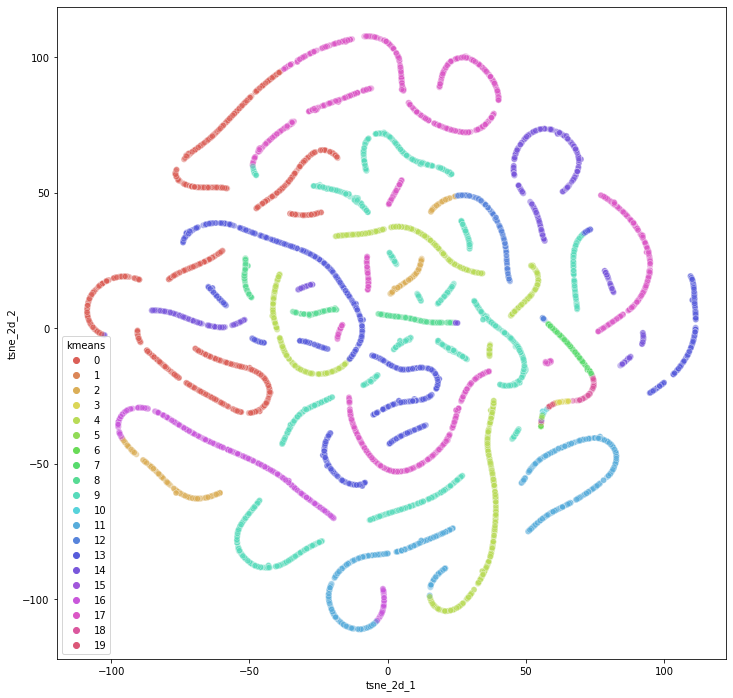

In [13]:
import seaborn as sns

x_proj = projection[:, 0]
y_proj = projection[:, 1]

X_df['tsne_2d_1'] = x_proj
X_df['tsne_2d_2'] = y_proj

k_clusters = 20 # kmean clusters

plt.figure(figsize=(12, 12))
sns.scatterplot(
    x="tsne_2d_1", y="tsne_2d_2",
    hue="kmeans",
    palette=sns.color_palette("hls", k_clusters),
    data=X_df,
    legend="full",
    alpha=0.5
)

# can cluster on tsne output
# can also cluster on PCA (mathematically better for PCA)

# PCA Visualization

In [14]:
from sklearn.decomposition import PCA

start_time = time.time()
pca = PCA(n_components=3)
pca_projection = pca.fit_transform(X)
end_time = time.time()
print(f"PCA Time Taken: {end_time - start_time} seconds")


PCA Time Taken: 0.015275955200195312 seconds


In [15]:
X_df['pca1'] = pca_projection[:, 0]
X_df['pca2'] = pca_projection[:, 1] 
X_df['pca3'] = pca_projection[:, 2]

In [16]:
print(f'Explained Variation for each Principal Component: {pca.explained_variance_ratio_}')
print(f'Total Explained Variation for 1st 3 Components: {sum(pca.explained_variance_ratio_)}')
# Note: Most(99%!) of the variation is explained by 1 principal component!

Explained Variation for each Principal Component: [9.99999923e-01 3.80998096e-08 2.79181058e-08]
Total Explained Variation for 1st 3 Components: 0.9999999890522941


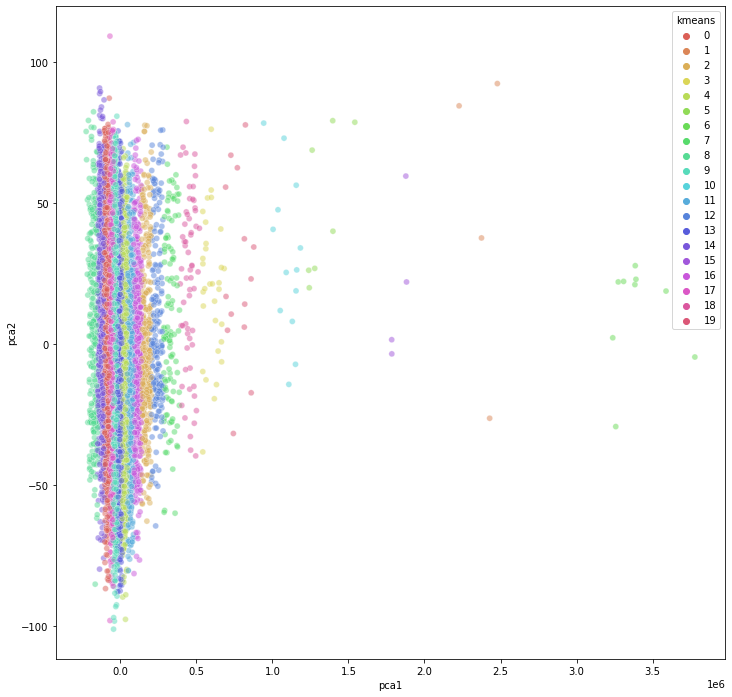

In [17]:
# 2D
plt.figure(figsize=(12,12))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="kmeans",
    palette=sns.color_palette("hls", k_clusters),
    data=X_df,
    legend="full",
    alpha=0.5
)
plt.show()

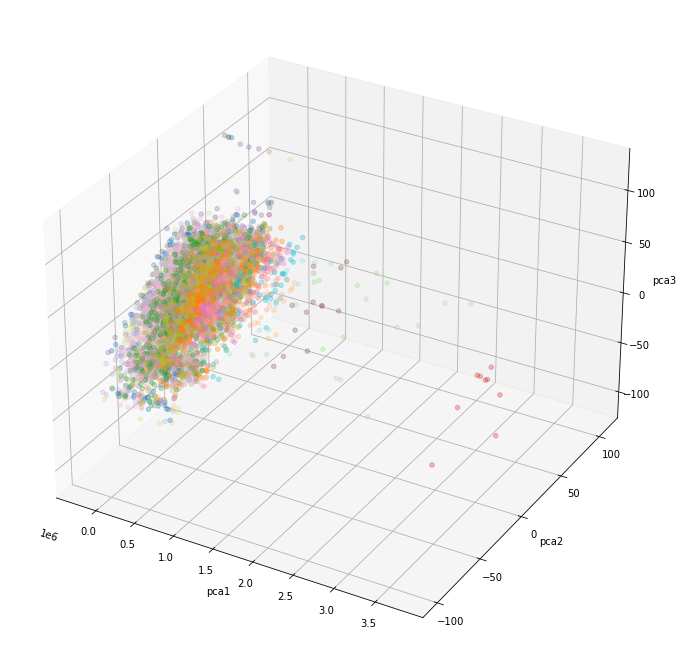

In [18]:
# 3D
ax = plt.figure(figsize=(12,12)).gca(projection='3d')
ax.scatter(
    xs=X_df["pca1"], 
    ys=X_df["pca2"], 
    zs=X_df["pca3"], 
    c=X_df["kmeans"], 
    cmap='tab20',
    alpha=0.3
)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

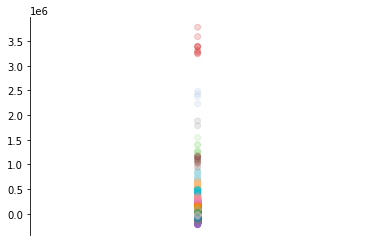

In [19]:
# 1D
fig, ax = plt.subplots()
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.scatter([0] * len(X_df), 
           X_df['pca1'], 
           c=X_df['kmeans'],
           cmap="tab20",
           alpha=0.2)
plt.show()

In [20]:
# TODO: Cluster on [PCA]/TSNE output